# JOBS Data

Import of all needed libraries, numpy, pandas, matplot, sckitlearn, some will be used further on. 

In [1]:
!pip install econml

     |████████████████████████████████| 3.3 MB 13.0 MB/s 
     |████████████████████████████████| 123 kB 71.8 MB/s 
     |████████████████████████████████| 77 kB 4.8 MB/s 
     |████████████████████████████████| 356 kB 64.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491672 sha256=9e25c2b571834bf9c5ae14e72b730ae6f83053e190a095328298746d318cbed3
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Data import and structure checking, we can see that we have background variables "x", treatment "t", outcome "y", and effect "e".

In [3]:
!wget "https://github.com/dmachlanski/CE888_2022/blob/main/project/data/jobs.npz?raw=true" -O "jobs.npz"

--2022-04-27 11:42:20--  https://github.com/dmachlanski/CE888_2022/blob/main/project/data/jobs.npz?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dmachlanski/CE888_2022/raw/main/project/data/jobs.npz [following]
--2022-04-27 11:42:21--  https://github.com/dmachlanski/CE888_2022/raw/main/project/data/jobs.npz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.npz [following]
--2022-04-27 11:42:21--  https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [4]:
df = np.load("jobs.npz")

df.files

['x', 't', 'y', 'e']

Quick check of missing values and shape. We are able to see that there are 3212 rows, and in "x" we notice is is a array of 17x3212, meaning there are 17 background features, while we also have those mentioned above including the labels and there are no missing values in the dataset.

In [5]:
for data in df.files:
  print(f'{data}: {df[data].shape}')

x: (3212, 17)
t: (3212, 1)
y: (3212, 1)
e: (3212, 1)


In this dataset we are able to see that it is closer to reality, as we don't have any counterfactuals, just the outcome, which happens to those datasets that are either purely observational or mixed with _Randomized Controlled Trials_. 

In [6]:
X = df['x']
T = df['t'].reshape(-1, 1)
Y = df['y'].reshape(-1, 1)
e = df['e']

In [7]:
for data in df.files:
  print(f'{data}: {df[data].shape}')

x: (3212, 17)
t: (3212, 1)
y: (3212, 1)
e: (3212, 1)


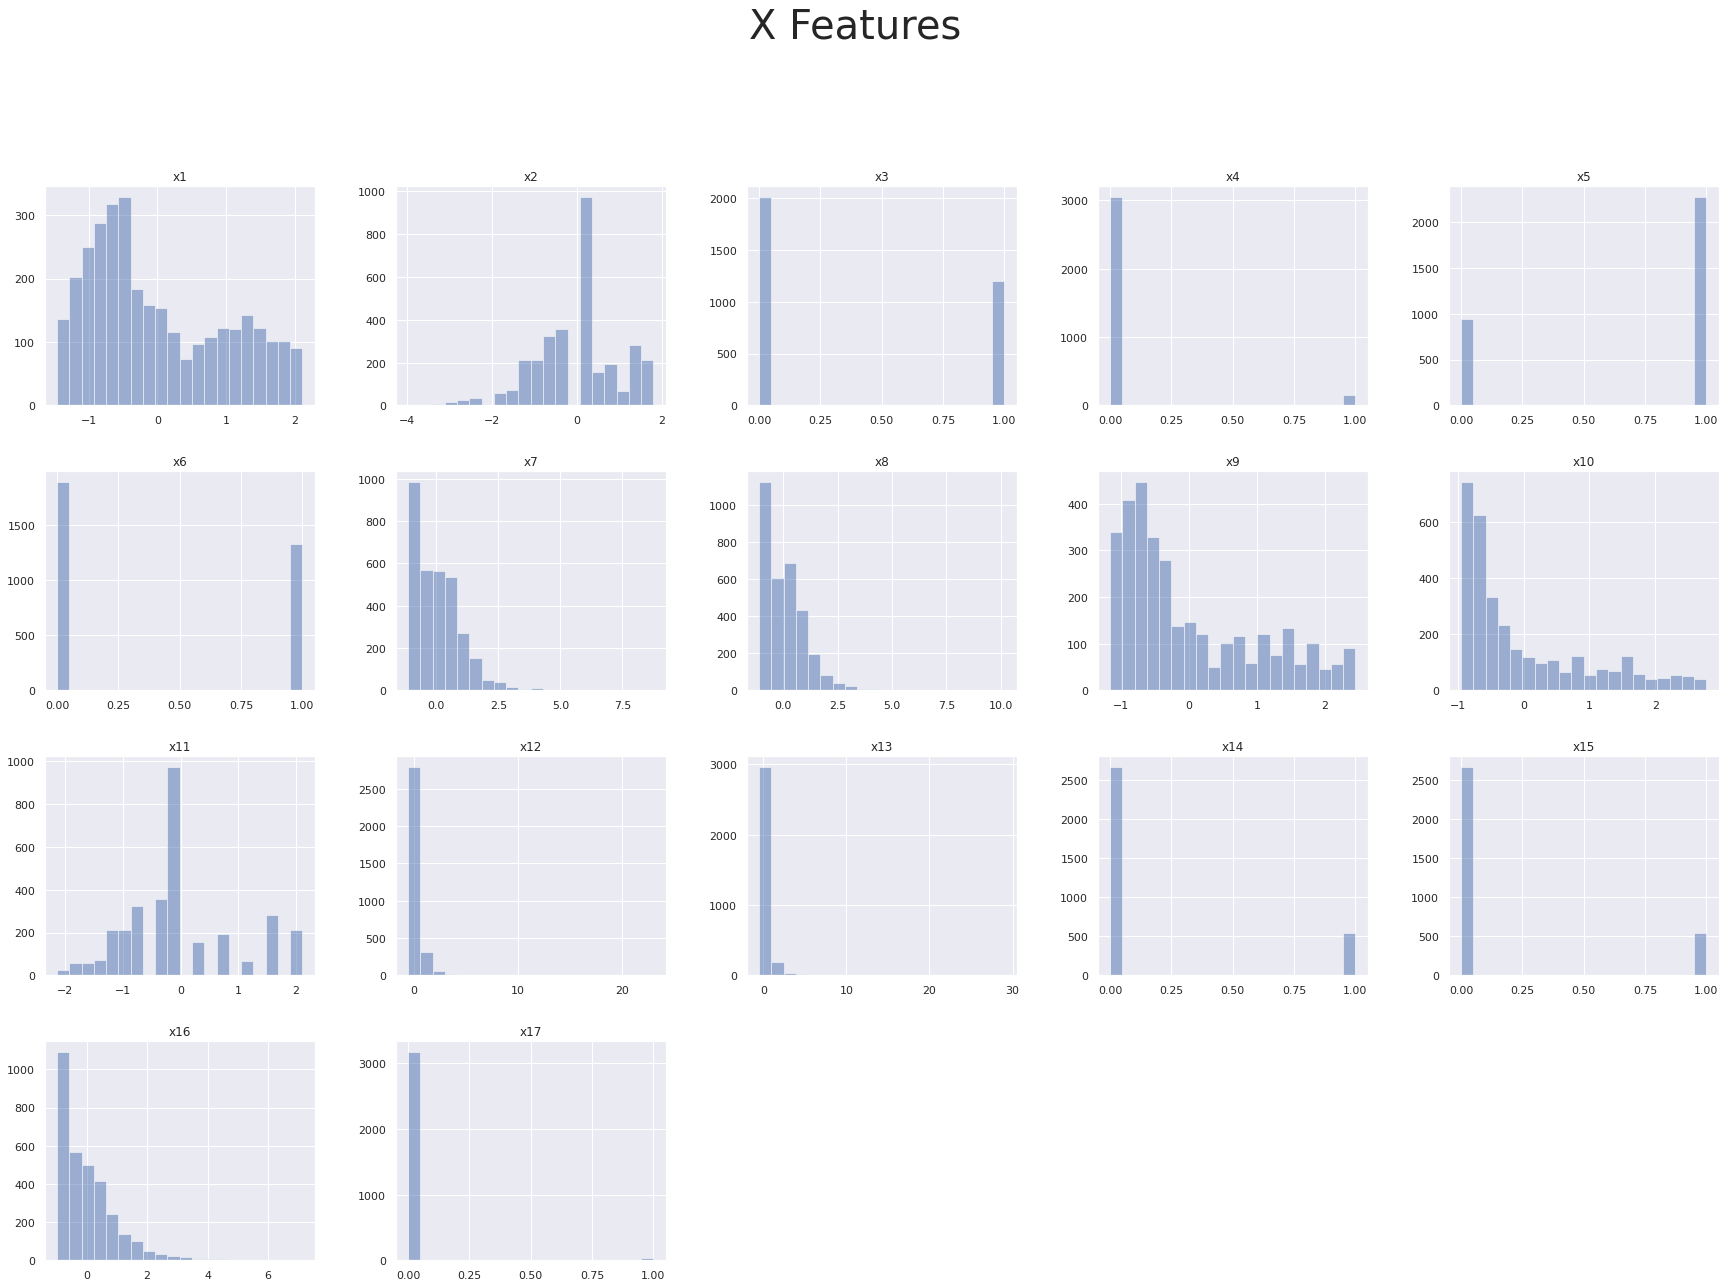

In [12]:
xName = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17"]
Xp = pd.DataFrame(data=X)
Xp.columns=xName

sns.set()
axes = Xp.hist(color='b', alpha=0.5, bins=20, figsize=(30,25), layout=(5, 5))
sns.set(font_scale=1.5)
plt.suptitle("X Features", size=40)

plt.savefig("ihdp_xFeatures.pdf", dpi=1500)


To have a better understandment of the behaviour of the data, we will plot it's histograms.

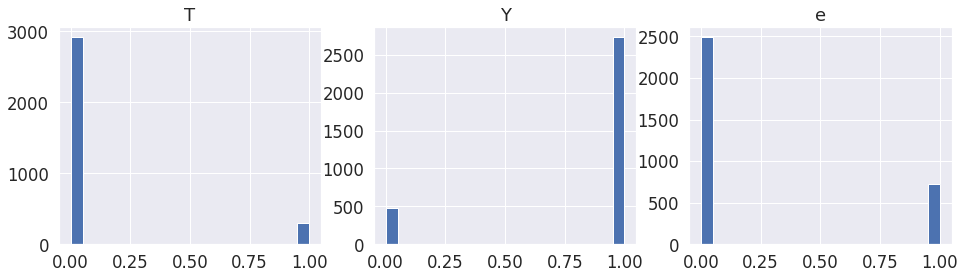

In [14]:
bins=20
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].hist(T, bins=bins)
axs[1].hist(Y, bins=bins)
axs[2].hist(e, bins=bins)
axs[0].title.set_text('T')
axs[1].title.set_text('Y')
axs[2].title.set_text('e')
plt.show()
fig.savefig("jobs_TreatmentAndElse.pdf", dpi=1200)

In [15]:
print("Amount of 0 in T: ", np.count_nonzero(df['t'] == 0))
print("Amount of 1 in T: ", np.count_nonzero(df['t'] == 1))

Amount of 0 in T:  2915
Amount of 1 in T:  297


In [16]:
print("Amount of 0 in Y: ", np.count_nonzero(df['y'] == 0))
print("Amount of 1 in Y: ", np.count_nonzero(df['y'] == 1))

Amount of 0 in Y:  482
Amount of 1 in Y:  2730


In [17]:
print("Amount of 0 in e: ", np.count_nonzero(df['e'] == 0))
print("Amount of 1 in e: ", np.count_nonzero(df['e'] == 1))

Amount of 0 in e:  2490
Amount of 1 in e:  722


In this case we are able to see that the "T", "Y" and "e" have a binary behaviour, and while it is noticeable using the variables histograms, a count was also printed to visualize in another way the differences in all 3 aspects. And further on we can establish that neither X nor Y follow a normal distribution.

## Preprocessing

In [19]:
x_train, x_test, y_train, y_test, t_train, t_test, e_train, e_test = train_test_split(X, Y, T, e, test_size=0.2)

In [20]:
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [21]:
rf = RandomForestClassifier()